In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from common_utilities import GlobalPaths

In [27]:
# Initialize StockPrice Paths
StockPriceGlobalPath = GlobalPaths(source_name="DATA", object_name="StockPrice")
StockPriceSilverLayerPath = StockPriceGlobalPath.createLayer(layer_name="SILVER")
StockPriceSilverFilePath = StockPriceSilverLayerPath.joinpath("StockPrice_data.csv")

# Initialize Holdings Paths
HoldingsGlobalPath = GlobalPaths(source_name="DATA", object_name="Holdings")
HoldingsGoldLayerPath = HoldingsGlobalPath.createLayer(layer_name="GOLD")
HoldingsGoldFilePath = HoldingsGoldLayerPath.joinpath("Holdings_data.csv")

# Initialize Investment Paths
InvestmentGlobalPath = GlobalPaths(source_name="DATA", object_name="Investment")
InvestmentGoldLayerPath = InvestmentGlobalPath.createLayer(layer_name="GOLD")
InvestmentGoldFilePath = InvestmentGoldLayerPath.joinpath("Investment_data.csv")

In [28]:
## PRESENTATION LAYER
df_Holdings_GOLD = pd.read_csv(HoldingsGoldFilePath)
df_Investment_GOLD = pd.read_csv(InvestmentGoldFilePath)
df_StockPrice_SILVER = pd.read_csv(StockPriceSilverFilePath)

# Convert datetime to date string
df_Holdings_GOLD["date"] = pd.to_datetime(
    df_Holdings_GOLD["date"]
)
df_Investment_GOLD["date"] = pd.to_datetime(
    df_Investment_GOLD["date"]
)
df_StockPrice_SILVER["date"] = pd.to_datetime(
    df_StockPrice_SILVER["date"]
)

# setting date column as index
df_Holdings_GOLD.set_index("date", inplace=True)
df_Investment_GOLD.set_index("date", inplace=True)
df_StockPrice_SILVER.set_index("date", inplace=True)

In [29]:
# multiply
df_Investment_GOLD = df_Holdings_GOLD.multiply(df_Investment_GOLD)
# Add the sum column
df_Investment_GOLD["investment"] = df_Investment_GOLD.sum(axis=1)

# multiply
df_stock_value = df_Holdings_GOLD.multiply(df_StockPrice_SILVER)
# Add the sum column
df_stock_value["stock_value"] = df_stock_value.sum(axis=1)

In [30]:
df = df_Investment_GOLD[["investment"]].join(df_stock_value[["stock_value"]])
df["pl"] = df["stock_value"] / df["investment"] * 100
df = df.round(2)
df = df[df["stock_value"] > 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1032 entries, 2020-04-21 to 2024-06-13
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   investment   1032 non-null   float64
 1   stock_value  1032 non-null   float64
 2   pl           1032 non-null   float64
dtypes: float64(3)
memory usage: 32.2 KB


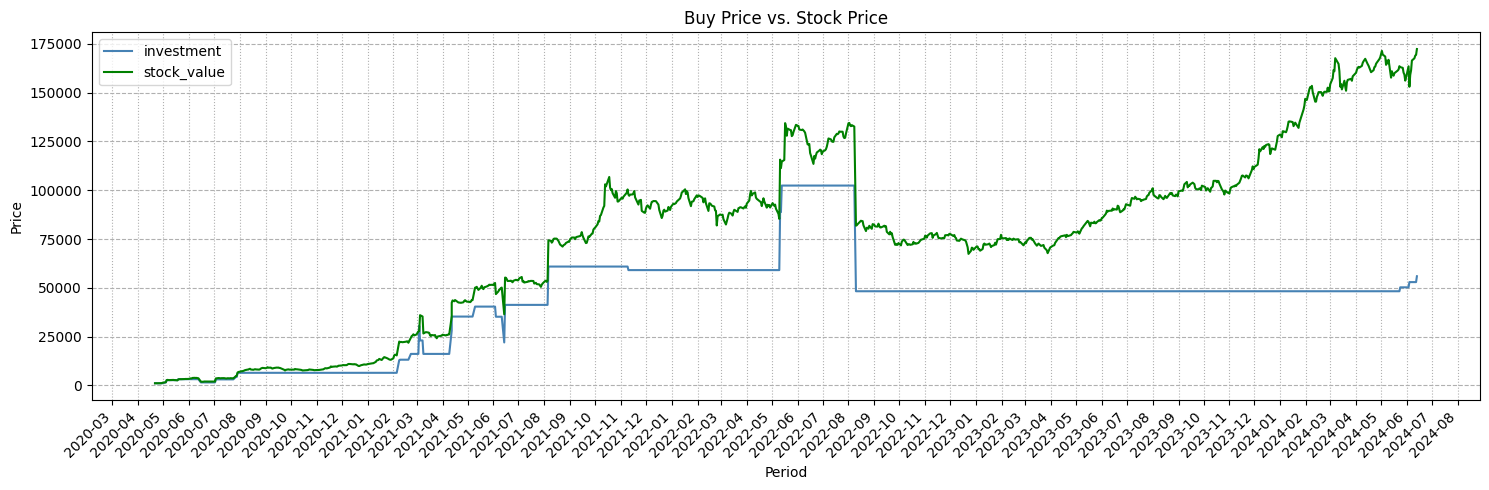

In [31]:
# plot the graph
fig, ax = plt.subplots(figsize=(15, 5))

# plot individual lines
ax.plot(df.index, df["investment"], label="investment", color="steelblue")
ax.plot(df.index, df["stock_value"], label="stock_value", color="green")

# set major ticks to months and format the ticks
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax.xaxis.grid(True, which="major", linestyle=":")
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

# Add a grid to the y-axis
ax.yaxis.grid(True, which="major", linestyle="--")

# add axis labels and a title
plt.ylabel("Price")
plt.xlabel("Period")
plt.title("Buy Price vs. Stock Price")
ax.legend()

# display plot
plt.tight_layout()
plt.show()

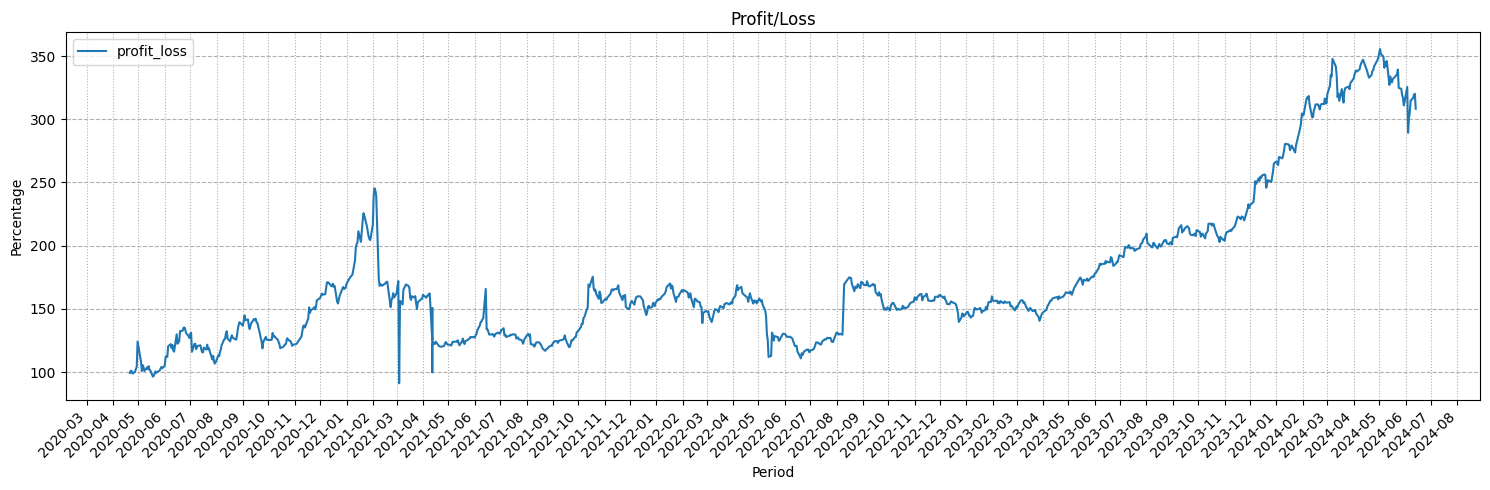

In [32]:
# plot the graph
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(df.index, df["pl"], label="profit_loss")

# set major ticks to months and format the ticks
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax.xaxis.grid(True, which="major", linestyle=":")
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

# Add a grid to the y-axis
ax.yaxis.grid(True, which="major", linestyle="--")

# add axis labels and a title
plt.ylabel("Percentage")
plt.xlabel("Period")
plt.title("Profit/Loss")
ax.legend()

# display plot
plt.tight_layout()
plt.show()